In [1]:
#!pip install scikit-learn

In [1]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors
from langdetect import detect, DetectorFactory, LangDetectException
import numpy as np

In [2]:
file_path = "reviews.csv.gz"
df = pd.read_csv(file_path, compression='gzip')
df


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
1,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
2,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à..."
3,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état..."
4,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...
...,...,...,...,...,...,...
1906974,1172983621702054593,1175214807642862917,2024-06-09,572103256,Styviana,J’ai adoré le séjour le logement est proche de...
1906975,1173129723872524460,1175233179479968565,2024-06-09,369509804,Jordi,Je recommande !
1906976,1173857918032711600,1175201190974294292,2024-06-09,521024568,Mouloud,sincèrement je recommande pas au contraire à f...
1906977,1173867169611242925,1175290664317450473,2024-06-09,497900186,Leona Elin,Wir haben sehr spontan gebucht und es hat alle...


In [6]:
columns_list = df.columns.tolist()
print(columns_list)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']


In [4]:
def clean_text(text):
    if isinstance(text, str): 
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text
    else:
        return "" 

df['cleaned_comments'] = df['comments'].apply(clean_text)

positive_keywords = ["Excellent endroit pour séjourner","excellent","well-located", "comfortable", "charming", "ideal", "quality","close", "impeccable", "clean",
    "pleasant", "superb", "perfect", "equipped", "quiet", "ambiance", "situated", "practical", "modern", "welcoming"
    "bien","confortable","charmant","idéal","qualité","proche","impeccable","propre","agréable","superbe","parfait","équipé","tranquille","ambiance","Très bien situé",
    "Confortable et agréable","Appartement charmant","Emplacement idéal", "Logement de qualité", "Très bon confort","Lieu de séjour parfait",
    "Logement bien équipé","Bien situé pour explorer la ville","Cadre agréable","Très bon rapport qualité-prix","Proche des commodités","Hébergement impeccable",
    "Confort et tranquillité","Superbe appartement","Excellente ambiance", "Bien situé pour les transports en commun",
    "Hébergement très propre","Réponse parfaite aux attentes",'great place', 'close to metro']
negative_keywords = ["Mauvais endroit pour séjourner",
    "Mal situé","Inconfortable","Appartement décevant","Emplacement médiocre","Logement de mauvaise qualité","Rapport qualité-prix mauvais",
    "Loin des commodités","Hébergement insatisfaisant","Confort médiocre","Lieu de séjour désagréable","Logement mal équipé",
    "Mal situé pour explorer la ville","Cadre désagréable","Inconfort et bruit","Appartement en mauvais état","Ambiance désagréable",
    "Mal situé pour les transports en commun","sale","Bad place to stay", "Poorly located", "Uncomfortable", "Disappointing apartment",
    "Hébergement sale","Réponse insuffisante aux attentes","mauvais","mal","inconfortable","décevant", "médiocre", "mauvaise qualité","loin","insatisfaisant",
     "Low quality accommodation", "Bad value for money", "Far from amenities", "Unsatisfactory accommodation"
    "désagréable","bruyant","mal situé","incomplet","ancien","dégradé",
    "impratique","inadapté","pauvre",
    "non fonctionnel","bad", "poor", "uncomfortable", "disappointing", "mediocre", "low quality", "far", "unsatisfactory", "dirty",
    "unpleasant", "noisy", "badly located", "incomplete", "old", "dilapidated", "impractical", "inadequate", "poor", "non-functional", "lacking"
    "dépourvu"]



def get_sentiment(comment, positive_keywords, negative_keywords):
    positive = any(keyword in comment for keyword in positive_keywords)
    negative = any(keyword in comment for keyword in negative_keywords)
    
    if positive and not negative:
        return "Positive"
    elif negative and not positive:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_comments'].apply(lambda x: get_sentiment(x, positive_keywords, negative_keywords))

print(df[['comments', 'sentiment']])

                                                  comments sentiment
0                  Tout s'est bien déroulé. Merci bien. PG   Neutral
1        Un petit nid fouiller douillet situé dans  app...  Positive
2        Appartement spacieux, propre,clair, et calme à...  Positive
3        Appartement totalement rénové, en parfait état...  Positive
4        Perfect location!! Nasrine was a delight and m...  Positive
...                                                    ...       ...
1906974  J’ai adoré le séjour le logement est proche de...  Positive
1906975                                    Je recommande !   Neutral
1906976  sincèrement je recommande pas au contraire à f...   Neutral
1906977  Wir haben sehr spontan gebucht und es hat alle...   Neutral
1906978             Perfect, easy check in and out. Lovely  Positive

[1906979 rows x 2 columns]


In [7]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,sentiment
0,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG,tout sest bien déroulé merci bien pg,Neutral
1,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...,un petit nid fouiller douillet situé dans app...,Positive
2,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à...",appartement spacieux propreclair et calme à pr...,Positive
3,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état...",appartement totalement rénové en parfait état ...,Positive
4,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...,perfect location nasrine was a delight and mad...,Positive
...,...,...,...,...,...,...,...,...
1906974,1172983621702054593,1175214807642862917,2024-06-09,572103256,Styviana,J’ai adoré le séjour le logement est proche de...,jai adoré le séjour le logement est proche de ...,Positive
1906975,1173129723872524460,1175233179479968565,2024-06-09,369509804,Jordi,Je recommande !,je recommande,Neutral
1906976,1173857918032711600,1175201190974294292,2024-06-09,521024568,Mouloud,sincèrement je recommande pas au contraire à f...,sincèrement je recommande pas au contraire à f...,Neutral
1906977,1173867169611242925,1175290664317450473,2024-06-09,497900186,Leona Elin,Wir haben sehr spontan gebucht und es hat alle...,wir haben sehr spontan gebucht und es hat alle...,Neutral


In [35]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG,Neutral
1,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...,Positive
2,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à...",Positive
3,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état...",Positive
4,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...,Positive


In [11]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

sentiment
Positive    944986
Neutral     889448
Negative     72545
Name: count, dtype: int64

In [47]:
df.to_csv('comments.csv', index=False)  
print("Successfully converted to CSV!")

Successfully converted to CSV!


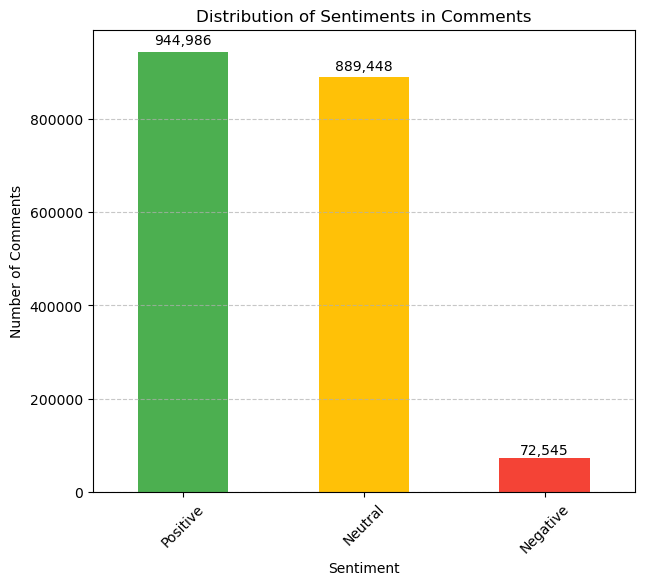

In [19]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(7, 6))

bars = sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Distribution of Sentiments in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01 * height,  
        f'{int(height):,}',  
        ha='center',
        va='bottom'
    )

plt.show()

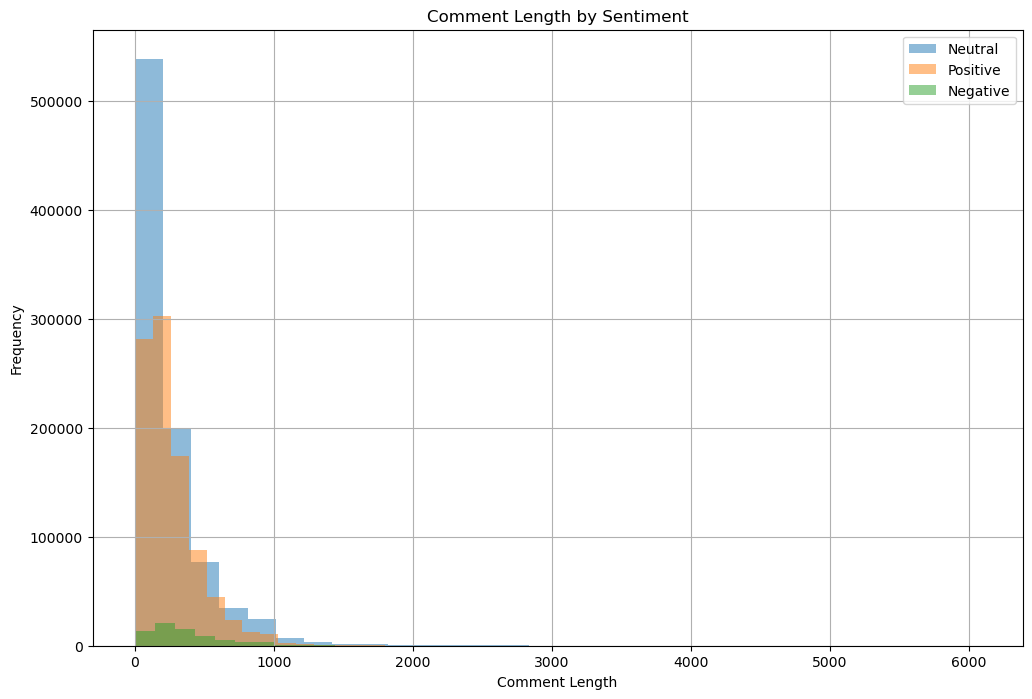

In [20]:
#Histogram of Comment Length by Sentiment
df['comments'] = df['comments'].astype(str).fillna('')
df['comment_length'] = df['comments'].apply(len)

plt.figure(figsize=(12, 8))
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    plt.hist(subset['comment_length'], bins=30, alpha=0.5, label=sentiment)

plt.title('Comment Length by Sentiment')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


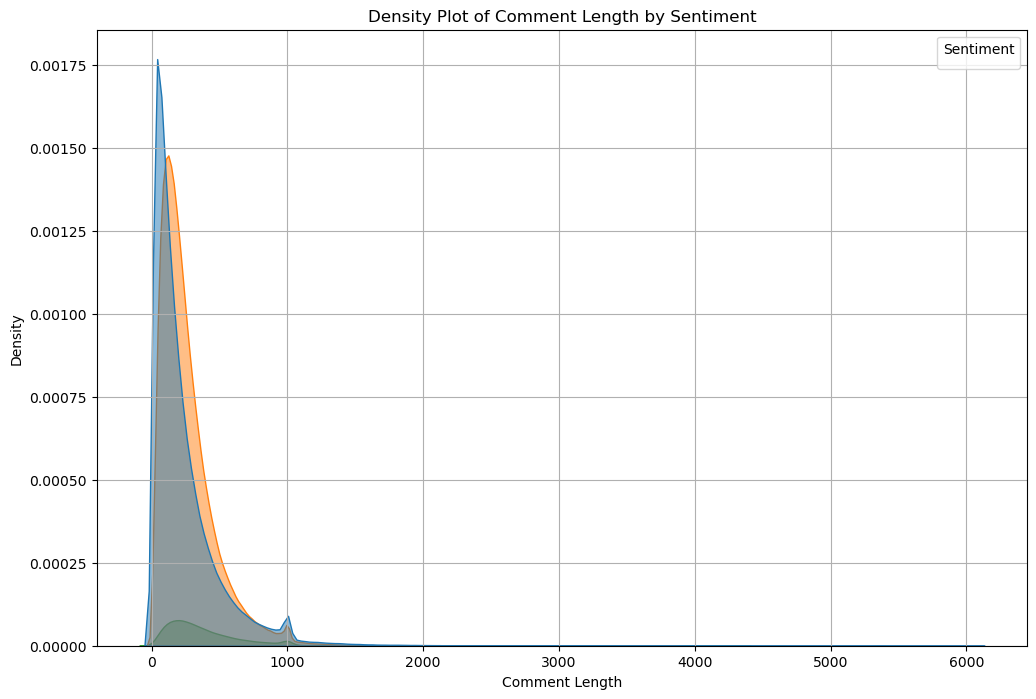

In [37]:
df['comments'] = df['comments'].astype(str).fillna('')
df['comment_length'] = df['comments'].apply(len)

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='comment_length', hue='sentiment', fill=True, alpha=0.5)
plt.title('Density Plot of Comment Length by Sentiment')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

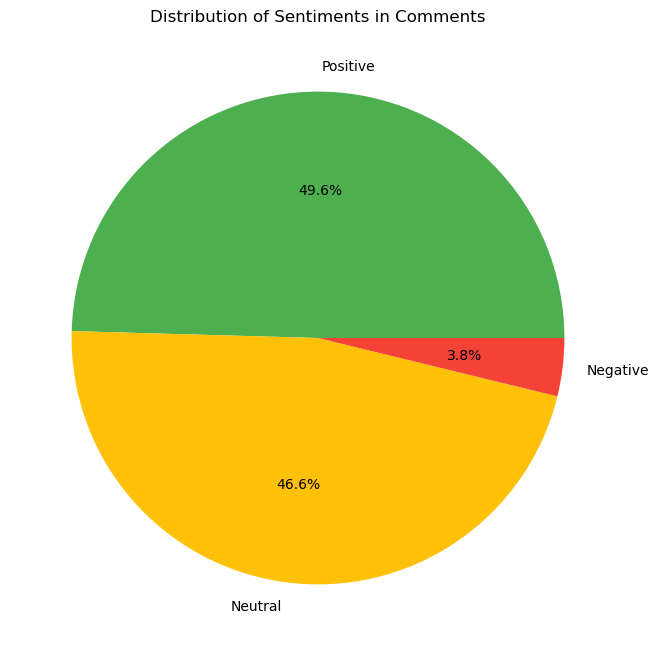

In [18]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Distribution of Sentiments in Comments')
plt.show()

In [9]:
#!pip install pandas nltk gensim
#!pip install --upgrade scipy gensim
# !pip install gensim
# !pip install langdetect

In [26]:
# nltk.download('stopwords')
# nltk.download('punkt')
# stop_words_dict = {lang: set(stopwords.words(lang)) for lang in ['english', 'french', 'german']}

# def preprocess_text(text):
#     if pd.isna(text) or not text or len(str(text).strip()) < 2:  
#         return []
    
#     try:
#         language = detect(text)
#         stop_words = stop_words_dict.get(language, set())
#         tokens = word_tokenize(text.lower()) 
#         filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
#         return filtered_tokens
#     except LangDetectException:
#         return []  

# df['processed_comments'] = df['comments'].apply(preprocess_text)
# print(df['processed_comments'])